In [101]:
""" Writing my first Graduate Model test case.
Author : QiaoTian
Date : 16th Sep 2016
Revised: 16th Sep 2014

""" 

import pandas as pd
import numpy as np
import csv as csv
import sklearn.ensemble as RandomForestClassifier

# read the genotype data into genotype_df
"""
col_names = []
with open('genotype.dat') as f:
    row = f.readline()
    #print(row)
    col_names = np.array(row.split(' '))
    print col_names.shape

genotype_df = pd.read_csv('genotype.dat', header=0, names=col_names)
pheno_df = pd.read_csv('phenotype.txt', header=None)
multi_phenos_df = pd.read_csv('multi_phenos.txt', header=None)

#print(len(train_df))
#rint(len(pheno_df))
#print(len(multi_phenos_df))

train_df = np.column_stack((genotype_df, pheno_df))
#print(genotype_df.shape)
"""

feature_cols = []
with open('genotype.csv') as f:
    firstline = f.readline()
    feature_cols = np.array(row.split(' '))
    assert(feature_cols.shape==(9445,))
genotype_df = pd.read_csv('genotype.csv', header=0, names=feature_cols)
assert(genotype_df.shape == (1000, 9445))
pheno_df = pd.read_csv('phenotype.txt', header=None)
assert(pheno_df.shape == (1000,1))
multi_phenos_df = pd.read_csv('multi_phenos.txt', header=None)

In [157]:
# train data
X = genotype_df
y = pheno_df

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

0      3
1      2
2      3
3      3
4      2
5      2
6      2
7      3
8      3
9      3
10     2
11     1
12     3
13     3
14     2
15     3
16     3
17     3
18     3
19     2
20     3
21     3
22     2
23     3
24     3
25     2
26     3
27     3
28     2
29     3
      ..
970    2
971    3
972    3
973    2
974    3
975    2
976    2
977    3
978    2
979    3
980    3
981    2
982    3
983    2
984    2
985    3
986    3
987    2
988    3
989    3
990    3
991    3
992    2
993    3
994    2
995    2
996    3
997    3
998    3
999    2
Name: rs3094315, dtype: int64


In [154]:
# default split is 75% for training and 25% for testing
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(750, 9445)
(750, 1)
(250, 9445)
(250, 1)


观察y与X的某些列的相关性

In [155]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

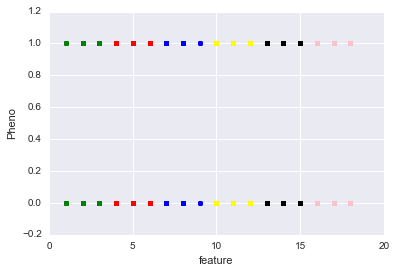

In [163]:
# visualize the relationship between the features and the response using scatterplots
#sns.pairplot(X.iloc[:,0:3], x_vars=feature_cols[0:3], y_vars='Pheno', size=7, aspect=0.7, kind='reg')

import matplotlib.pyplot as plt

plt.scatter(X.iloc[:,0], y, color='green', label='feature0')
plt.scatter(X.iloc[:,1], y, color='red', label='feature1')
plt.scatter(X.iloc[:,2], y, color='blue', label='feature1')
plt.scatter(X.iloc[:,3], y, color='yellow', label='feature1')
plt.scatter(X.iloc[:,4], y, color='black', label='feature1')
plt.scatter(X.iloc[:,5], y, color='pink', label='feature1')
plt.scatter(X.iloc[:,6], y, color='pink', label='feature1')
plt.scatter(X.iloc[:,7], y, color='pink', label='feature1')
plt.scatter(X.iloc[:,8], y, color='pink', label='feature1')
plt.scatter(X.iloc[:,9], y, color='pink', label='feature1')
plt.scatter(X.iloc[:,10], y, color='pink', label='feature1')
plt.scatter(X.iloc[:,11], y, color='pink', label='feature1')
plt.scatter(X.iloc[:,12], y, color='pink', label='feature1')
#plt.ylim(0.0, 1e0)
plt.ylabel('Pheno')
plt.xlabel('feature')
#plt.legend(loc="upper left")
plt.show()

In [93]:
# Linear regression in scikit-learn
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [94]:
print linreg.intercept_ # 截距
print linreg.coef_

[-2935.28669066]
[[ 0.00201554 -0.00293234  0.00316156 ...,  0.00812316 -0.00536298
   0.00268942]]


In [95]:
zip(feature_cols, linreg.coef_)

[('rs3094315', array([ 0.00201554, -0.00293234,  0.00316156, ...,  0.00812316,
         -0.00536298,  0.00268942]))]

In [99]:
y_pred_class = linreg.predict(X_test)

In [100]:
# Mean Absolute Error(MAE)
from sklearn import metrics
print metrics.mean_absolute_error(y_test, y_pred_class)

0.513580030706
